<h2>Basic Data Exploration:</h2>


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df1 = pd.read_csv(r"C:\Users\eissa\OneDrive\Desktop\work\SHAI\Salaries.csv")

In [17]:
df1.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [18]:
# This line 'df1.info' show us columns with their data type & their non-null count
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [19]:
# Print the shape of the DataFrame
print(df1.shape) 
# Note: This line prints the number of rows and columns in the DataFrame.

# Print the column names of the DataFrame
print(df1.columns)
# Note: This line prints the names of all the columns in the DataFrame.

# Print the total number of elements in the DataFrame
print(df1.size)
# Note: This line prints the total number of elements (cells) in the DataFrame.


(148654, 13)
Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')
1932502


<h2>Descriptive Statistics:</h2>


In [20]:
df1.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [21]:
# Convert columns to numeric data types if they exist
if 'Salary' in df1.columns:
    df1['Salary'] = pd.to_numeric(df1['Salary'], errors='coerce')
if 'YearsExperience' in df1.columns:
    df1['YearsExperience'] = pd.to_numeric(df1['YearsExperience'], errors='coerce')

# Calculate the data range
data_range = df1.select_dtypes(include=[np.number]).max() - df1.select_dtypes(include=[np.number]).min()
print(data_range)

Id                  148653.00
BasePay             319441.02
OvertimePay         245131.89
OtherPay            407242.84
Benefits             96604.55
TotalPay            568213.56
TotalPayBenefits    568213.56
Year                     3.00
Notes                     NaN
Status                    NaN
dtype: float64


<h2>Data Cleaning:</h2>


In [22]:
df1.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [23]:
# Specify columns to fill with mean
columns_to_fill = ['Benefits', 'BasePay', 'OvertimePay',"OtherPay"]

# Loop through specified columns and fill null values with the mean
for col in columns_to_fill:
    if df1[col].isnull().any():
        mean_value = df1[col].mean()
        df1[col].fillna(mean_value, inplace=True)


In [24]:
# drop columns that is contain full null values in their cells and unnecessary coloumns like 'Id' 
df1 = df1.drop(columns=['Notes','Id','Status'])

# Print information about the DataFrame after filling null values
print(df1.info())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  object 
 2   BasePay           148654 non-null  float64
 3   OvertimePay       148654 non-null  float64
 4   OtherPay          148654 non-null  float64
 5   Benefits          148654 non-null  float64
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
 9   Agency            148654 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 11.3+ MB
None


In [25]:
df1.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco


<h2>Basic Data Visualization:</h2>


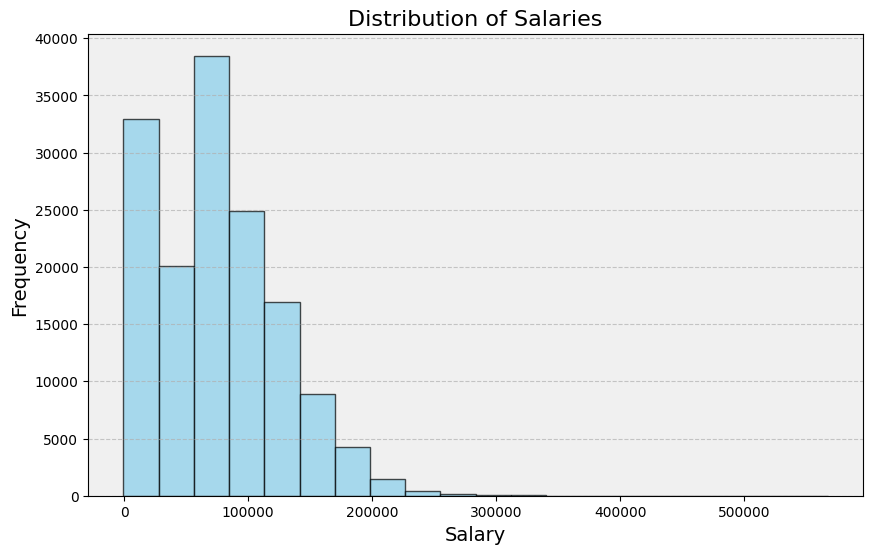

In [26]:
# Create a histogram with effects
plt.figure(figsize=(10, 6))

# Add color and transparency
plt.hist(df1['TotalPay'], bins=20, edgecolor='black', color='skyblue', alpha=0.7)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Salaries', fontsize=16)

# Add a background color
plt.gca().set_facecolor('#F0F0F0')

# Show the plot
plt.show()

In [58]:
len(df1["JobTitle"].unique())


2159

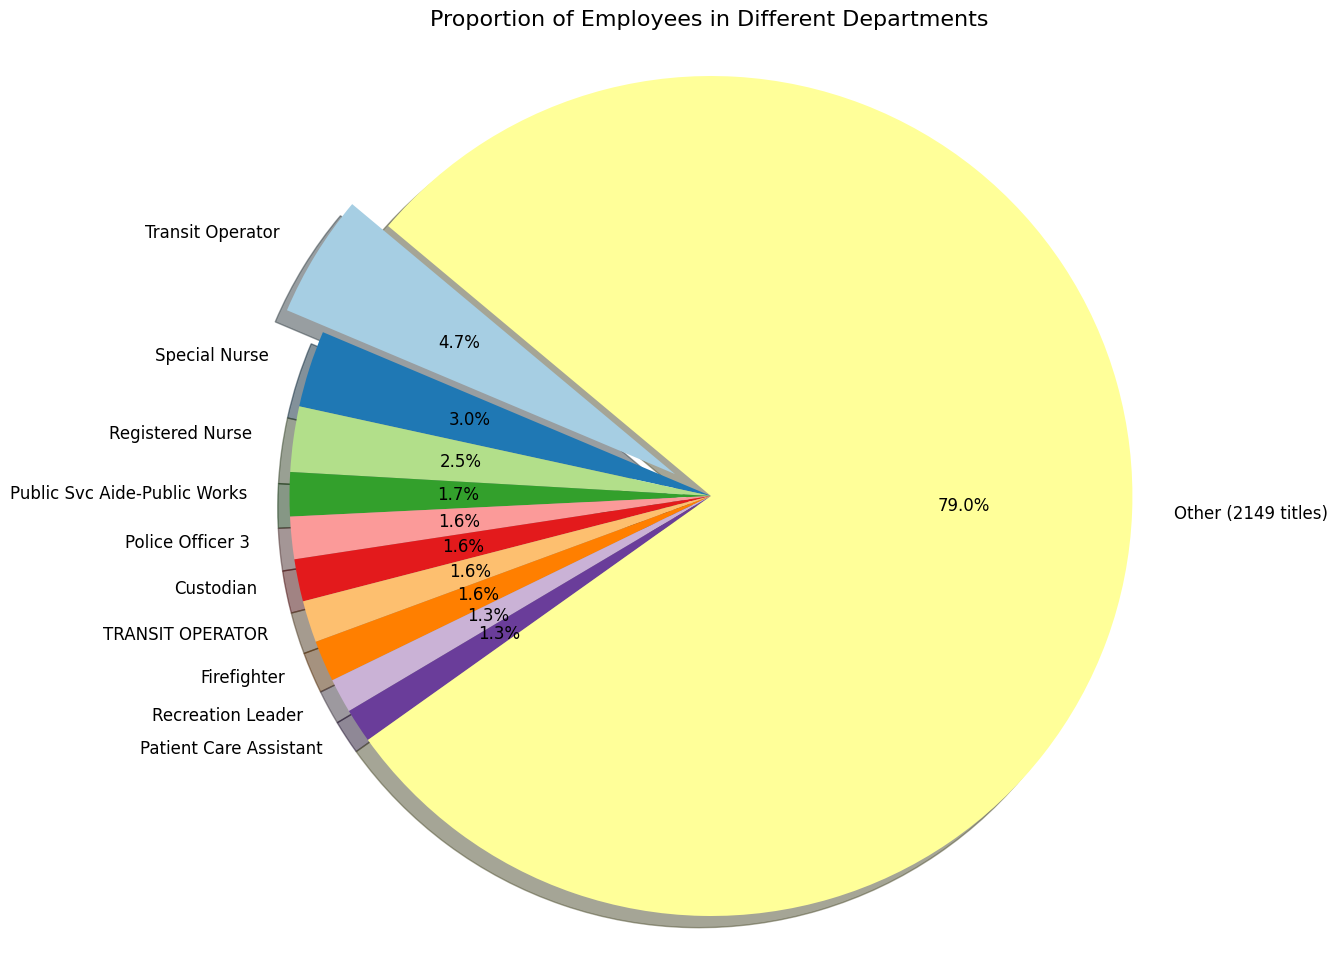

In [27]:
# since we have 2159 we can't visualize all of them in pie chart so i will take the top repetitive jobs title
# and put rest data together in one slice and pie chart them

# Get the top N most common job titles (adjust N as needed)
top_n = 10
top_job_titles = df1['JobTitle'].value_counts().nlargest(top_n).index
df_top = df1[df1['JobTitle'].isin(top_job_titles)]

# Group the rest into an "Other" category
df_other = df1[~df1['JobTitle'].isin(top_job_titles)]
other_count = df_other['JobTitle'].nunique()

# Combine the top N with the "Other" category
combined_counts = pd.concat([df_top['JobTitle'].value_counts(), pd.Series({f'Other ({other_count} titles)': len(df_other)})])

# Plot a pie chart with enhancements
plt.figure(figsize=(12, 12))

# Define colors for better visibility
colors = plt.cm.Paired.colors

# Explode a slice for emphasis (e.g., the largest slice)
explode = (0.1,) + (0,) * (len(combined_counts) - 1)

# Plot the pie chart
plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True, textprops={'fontsize': 12})

# Add a title with a larger font size
plt.title('Proportion of Employees in Different Departments', fontsize=16)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

<h2>Grouped Analysis:</h2>


In [59]:
# Group the data by 'JobTitle' and calculate average salary for each group
average_salaries = df1.groupby('JobTitle')['TotalPay'].mean().round(2).sort_values(ascending=False)

# Display the rounded average salaries
print(average_salaries)


JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.28
Chief Investment Officer                          339653.70
Chief of Police                                   329183.65
Chief, Fire Department                            325971.68
DEPUTY DIRECTOR OF INVESTMENTS                    307899.46
                                                    ...    
Commissioner 16.700c, No Pay                          25.76
IS Technician Assistant                                0.00
Not provided                                           0.00
Public Safety Comm Tech                                0.00
Drug Court Coordinator                                 0.00
Name: TotalPay, Length: 2159, dtype: float64


 **Simple Correlation Analysis**:

C:\Users\eissa\AppData\Local\Temp\ipykernel_20844\2382347378.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_plot = sns.scatterplot(x='BasePay', y='TotalPay', data=df1, color='skyblue', edgecolor='black', alpha=0.7, palette=custom_palette)


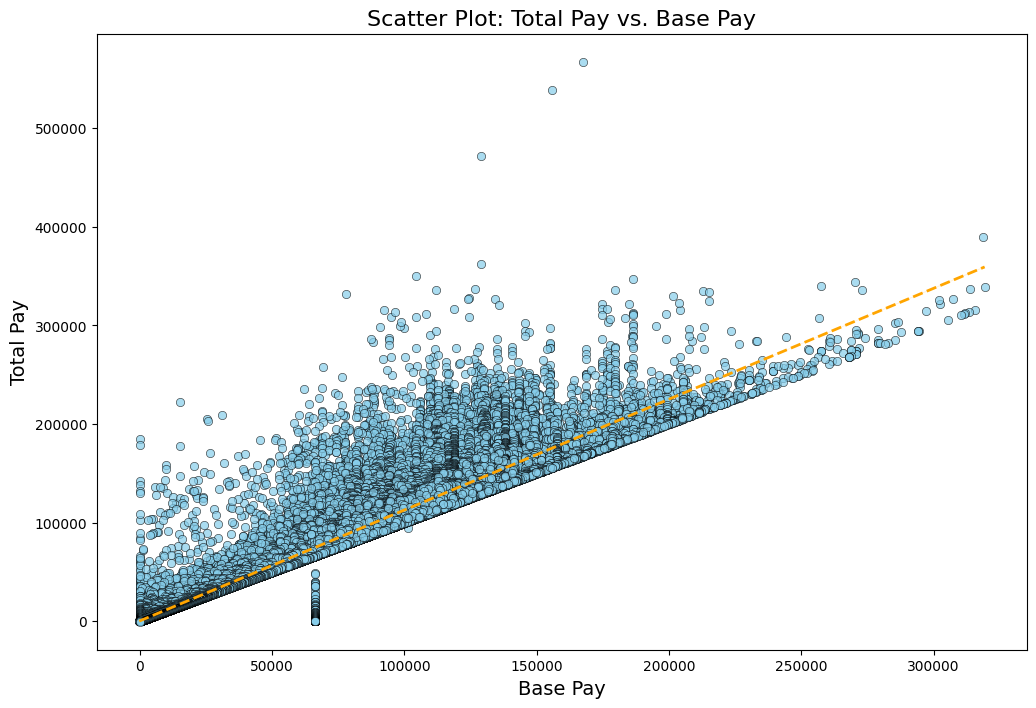

In [53]:
# Set a custom color palette
custom_palette = sns.color_palette("viridis", as_cmap=True)

# Create a scatter plot with effects
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='BasePay', y='TotalPay', data=df1, color='skyblue', edgecolor='black', alpha=0.7, palette=custom_palette)

# Add a regression line for better trend visualization
sns.regplot(x='BasePay', y='TotalPay', data=df1, scatter=False, color='orange', line_kws={'linestyle': '--', 'linewidth': 2})

# Customize axes labels and title
plt.xlabel('Base Pay', fontsize=14)
plt.ylabel('Total Pay', fontsize=14)
plt.title('Scatter Plot: Total Pay vs. Base Pay', fontsize=16)

# Show the plot
plt.show()


<h2> Summary of Insights: </h2>

### Identifing and looking at the Data

Dataset Overview: The dataset contains a specific number of rows and columns, representing a structured collection of information.

Data Structure: The number of rows signifies the instances or entries in the dataset, while the columns denote distinct attributes or features associated with each entry.

Data Types Exploration: Each column in the dataset is characterized by a specific data type, indicating the nature of information it holds.

Data Quality Check: A thorough examination of the dataset is conducted to identify any missing values present in each column. This ensures the integrity and completeness of the data.


### Missing Values and Data Imputation

clean data from Missing values by using imputation with mean of data

Data Range of numeric columns was calculated to understand the spread of the data.


### Salary Distribution Histogram

A histogram was created to visualize the distribution of salaries ('TotalPay'). Effects such as color, transparency, and grid lines were applied for better aesthetics and readability.


###  Job Title Analysis - Average Salaries

The analysis involved grouping the dataset by 'JobTitle' using Pandas, allowing the calculation of mean total pay for each role. The rounded average salaries were then presented in descending order. This concise code offers valuable insights into compensation distribution across job titles within the organization.



### Correlation Analysis: Total Pay vs. Base Pay

A scatter plot was created to visualize the relationship between 'Total Pay' and 'Base Pay'. 

The correlation coefficient was calculated to be 0.95. 

The positive correlation between base pay and total pay, meaning that employees with higher base pay also tend to have higher total pay.


### Professional Visualizations

Visualizations were enhanced with professional styling, color palettes, regression lines, and additional effects for a polished and insightful presentation.


### Employee Department Proportions(Job Title Pie Chart)

The pie chart visually communicates the distribution of employees across various job titles, emphasizing the top 10 most common roles while consolidating the rest into an "Other" category. Key points include:

##### Focused Visualization:

To manage complexity with 2159 unique job titles, the analysis prioritizes the top 10 most common titles for clarity.
The pie chart efficiently captures the proportion of employees in these top roles.

##### Visual Enhancements:

Colors are thoughtfully selected for visibility, aiding in easy differentiation of categories.
An exploded slice accentuates the largest category, providing emphasis and focus.